# Estimate Parameters 


In [43]:
# Requirements
library(readxl)
library(dplyr)
library(ggplot2)
options(scipen = 999)

### Risk Free Rate Parameter
- Read in Bloomberg data for 3 Month Federal Bills rate 
- Filter date (2009/01/01 - 2019/12/31)
- Take the average during that period 

In [44]:
# Read in treasury rates data
rates <- read_excel("Data/3MonthFedBills_2007_01_01_2020_12_12.xlsx")
head(rates)

Date,Last Price
<dttm>,<dbl>
2020-12-31,0.072
2020-12-30,0.080
2020-12-29,0.091
2020-12-28,0.087
2020-12-24,0.084
2020-12-23,0.081


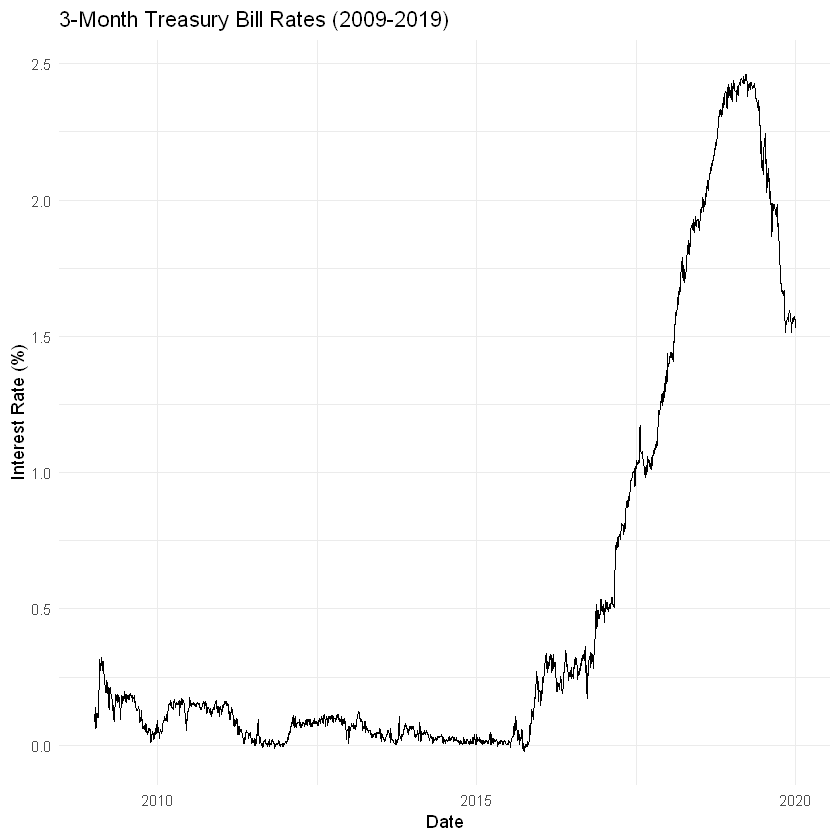

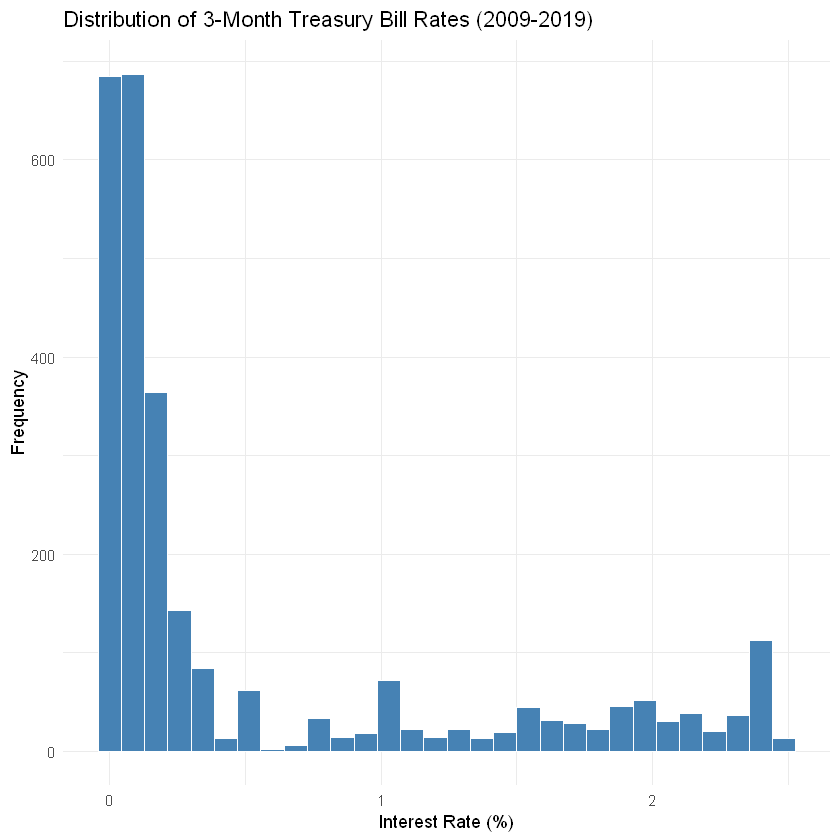

In [45]:
# Filter the data for the specified date range
filtered_rates <- rates %>%
    mutate(Date = as.Date(Date)) %>%
    filter(Date >= as.Date("2009-01-01") & Date <= as.Date("2019-12-31"))

# Plot the interest rates
ggplot(filtered_rates, aes(x = Date, y = `Last Price`)) +
    geom_line() +
    labs(title = "3-Month Treasury Bill Rates (2009-2019)",
         x = "Date",
         y = "Interest Rate (%)") +
    theme_minimal()

# Plot the distribution of interest rates
ggplot(filtered_rates, aes(x = `Last Price`)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of 3-Month Treasury Bill Rates (2009-2019)",
    x = "Interest Rate (%)",
    y = "Frequency"
  ) +
  theme_minimal()

In [46]:
cat("Average 3-month Treasury rate from 2009 to 2019:", mean(filtered_rates$`Last Price`), "\n")

Average 3-month Treasury rate from 2009 to 2019: 0.5290473 


### Volatility Parameter 
- Read in Bloomberg data for SnP500 data
- Filter date (2009/01/01 - 2019/12/31)
- Print intial value S0
- Calculate log returns
- Take the standard deviation of the log returns 

In [47]:
# Read in SnP 500 data
snp<- read_excel("Data/SnPBloomberg_2007_01_01_2020_12_01.xlsx")
head(snp)

Date,Last Price
<dttm>,<dbl>
2020-12-01,3662.45
2020-11-30,3621.63
2020-11-27,3638.35
2020-11-25,3629.65
2020-11-24,3635.41
2020-11-23,3577.59


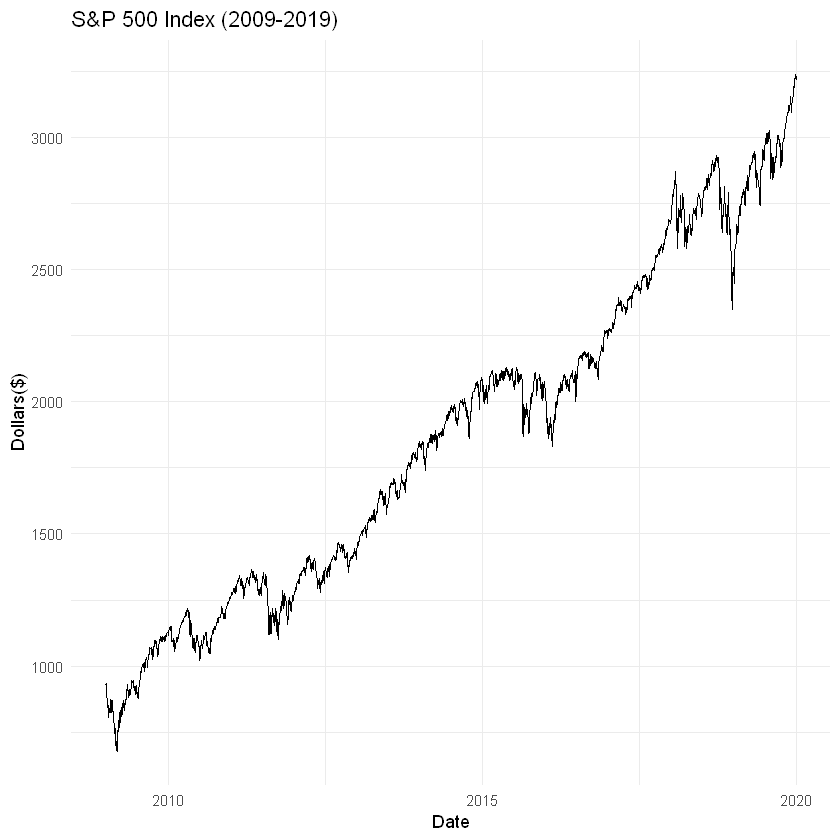

In [48]:
# Filter the data for the specified date range
filtered_snp <- snp %>%
    mutate(Date = as.Date(Date)) %>%
    filter(Date >= as.Date("2009-01-01") & Date <= as.Date("2019-12-31"))%>% arrange(Date)%>%
    mutate(Log_Returns = log(`Last Price` / lag(`Last Price`)))

# Plot the S&P 500 data
ggplot(filtered_snp, aes(x = Date, y = `Last Price`)) +
    geom_line() +
    labs(
        title = "S&P 500 Index (2009-2019)",
        x = "Date",
        y = "Dollars($)") + 
    theme_minimal()

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


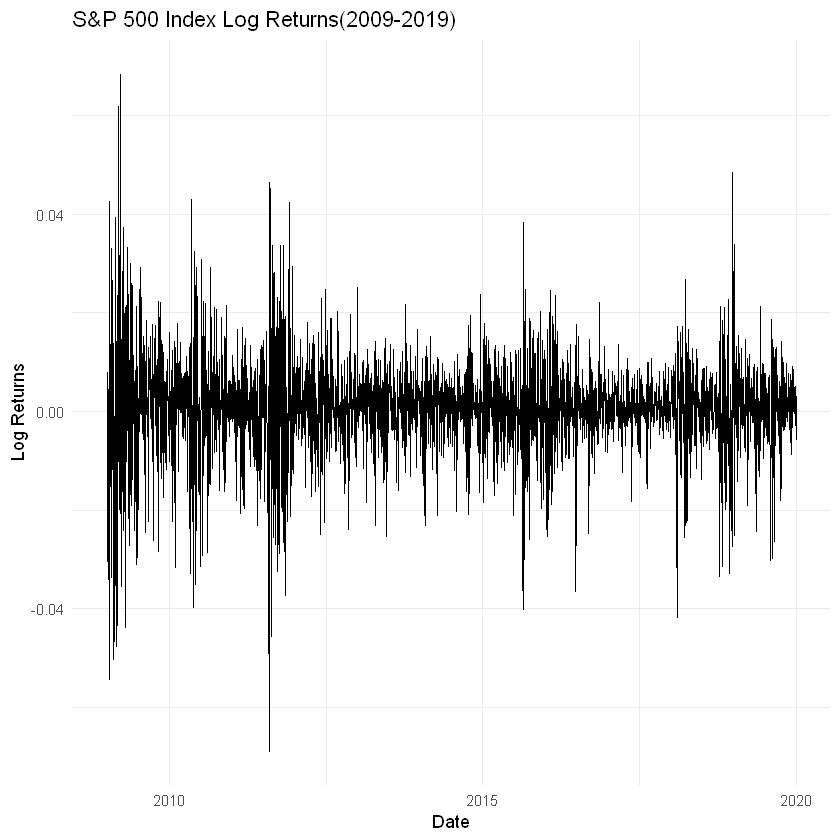

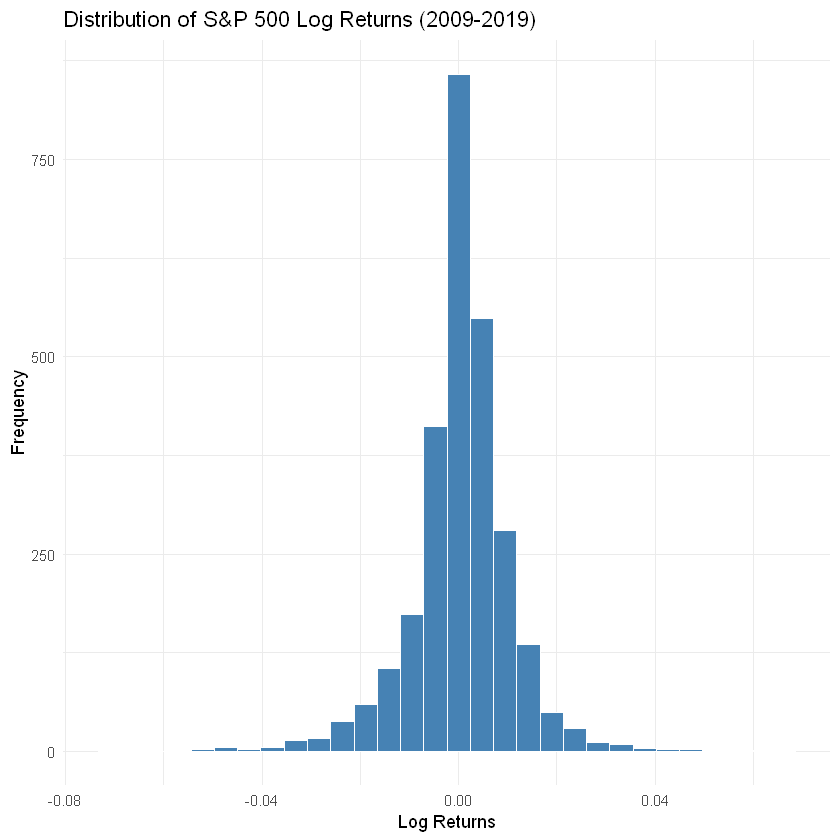

In [49]:
# Plot the S&P 500 log returns 
ggplot(filtered_snp, aes(x = Date, y = Log_Returns)) +
    geom_line() +
    labs(
        title = "S&P 500 Index Log Returns(2009-2019)",
        x = "Date",
        y = "Log Returns") + 
    theme_minimal()
    
# Plot distribution of log returns
ggplot(filtered_snp, aes(x = Log_Returns)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of S&P 500 Log Returns (2009-2019)",
    x = "Log Returns",
    y = "Frequency"
  ) +
  theme_minimal()

In [ ]:
# Value on January 2, 2009 
S_0 <- head(filtered_snp$`Last Price`, 1)
cat("Initial value S_0:", S_0, "\n")

Initial value S_0: 931.8 


In [53]:
cat("Standard deviation of log returns:", sd(filtered_snp$Log_Returns, na.rm = TRUE), "\n")

Standard deviation of log returns: 0.01026789 


In [54]:
cat("Mean of log returns:", mean(filtered_snp$Log_Returns, na.rm = TRUE), "\n")

Mean of log returns: 0.0004493533 
